<a href="https://colab.research.google.com/github/sorennelson/Deep_Learning_with_Python/blob/master/Housing_Prices_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install numpy==1.16.1

     |████████████████████████████████| 17.3MB 2.8MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4


In [0]:
import numpy as np
import tensorflow as tf

import keras
from keras.datasets import boston_housing
from keras import models
from keras import layers

import matplotlib.pyplot as plt

Using TensorFlow backend.


**Importing**

In [0]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [0]:
print(train_data.shape)
print(test_data.shape)
train_data[0]

(404, 13)
(102, 13)


array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

**Normalization**

In [0]:
mean = train_data.mean(axis=0)
train_data -= mean

std_dev = train_data.std(axis=0)
train_data /= std_dev

test_data -= mean
test_data /= std_dev

train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

**Build and Train Model**

In [0]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, 
                         activation='relu', 
                         input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [0]:
k = 4
num_val_samples = len(train_data) // k # // - division with floor
num_epochs = 100
all_scores = []

In [0]:
for i in range(k):
  print("processing fold", i)
  
  # Partition Data
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
  
  partial_train_data = np.concatenate(
  [train_data[:i * num_val_samples],
   train_data[(i+1) * num_val_samples:]],
  axis=0)
  
  partial_train_targets = np.concatenate(
  [train_targets[:i * num_val_samples],
   train_targets[(i+1) * num_val_samples:]],
  axis=0)
  
  # Run Model
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
                     validation_data=(val_data, val_targets),
                     epochs=num_epochs, batch_size=1, verbose=0)
  # Evaluate Model
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

processing fold 0
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
processing fold 1
processing fold 2
processing fold 3


In [0]:
print(all_scores)
print(np.mean(all_scores))

[1.8179170259154669, 2.3360615838872323, 2.6472588447060916, 2.3052040905055433]
2.2766103862535836


*Above with 100 epochs is off by an average of $2200 which isn't very good. Train below with 500 epochs.*

In [0]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print("processing fold", i)
  
  # Partition Data
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
  
  partial_train_data = np.concatenate(
  [train_data[:i * num_val_samples],
   train_data[(i+1) * num_val_samples:]],
  axis=0)
  
  partial_train_targets = np.concatenate(
  [train_targets[:i * num_val_samples],
   train_targets[(i+1) * num_val_samples:]],
  axis=0)
  
  # Run Model
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
                     validation_data=(val_data, val_targets),
                     epochs=num_epochs, batch_size=1, verbose=0)

  mae_history = history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)

processing fold 0
processing fold 1
processing fold 2
processing fold 3


In [0]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_mae_history

[14.493802104846086,
 5.880826636116103,
 4.472431984278234,
 3.8874567959568287,
 3.6207769814104136,
 3.4204076870833293,
 3.335957797447054,
 3.209675871499694,
 3.131149876235735,
 3.0618569402411433,
 2.9615372348539903,
 2.9392024786165445,
 2.924724073693304,
 2.833521553785494,
 2.7877248525619507,
 2.7095543169739225,
 2.677402239034672,
 2.6540950819997504,
 2.682464335224416,
 2.6197181385342434,
 2.616664959652589,
 2.5385080269067597,
 2.491297791499903,
 2.4984768204169696,
 2.52947210321332,
 2.4755680006329372,
 2.4574910272466073,
 2.486836893723743,
 2.417226858658366,
 2.4910202710935385,
 2.407057860110066,
 2.436298179154349,
 2.432905317533134,
 2.4351403642408918,
 2.4219394107856376,
 2.3630797827597894,
 2.3628793376507145,
 2.3566769916232273,
 2.373367139608553,
 2.406378203099317,
 2.3225332734608415,
 2.3989232955592694,
 2.4133891669830474,
 2.4231040761022284,
 2.3207736180560423,
 2.449535125553018,
 2.3421053367085976,
 2.340939481659691,
 2.33150388108

**Plotting**

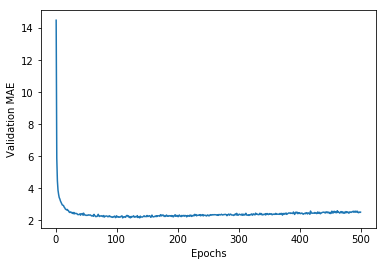

In [0]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [0]:
# Clean up the plotting by removing first 10 epochs and replacing each point with exponential average of previous points (for smooth curve)
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

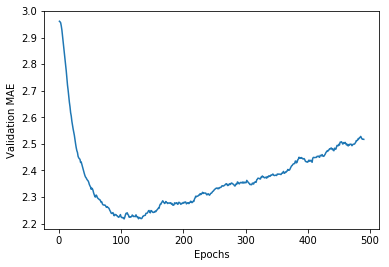

In [0]:
smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

*Starts to overfit around 100 epochs.*

**Final Model**

In [0]:
# Run Model
model = build_model()
history = model.fit(train_data, train_targets,
                     epochs=80, batch_size=1, verbose=0)

mae_history = history.history['mean_absolute_error']

# Evaluate Model
test_mse, test_mae = model.evaluate(test_data, test_targets, verbose=0)
print(test_mae)

2.5738121948990167
